In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv("data/csv_result-4year.csv")
df = df.loc[:, df.columns!='id'].replace('?', np.nan)
top = 0.887765522875817
data = df
df = df.loc[:, ~df.columns.isin(['Attr37', 'Attr27', 'Attr24'])].dropna()
positive_class_rate = df['class'].sum()/len(df)
df = df.astype(float)
df.reset_index(inplace=True)


/var/folders/hk/0nprt9x92231fsxzv3sf0jph0000gn/T/ipykernel_9705/447679616.py:1: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/csv_result-4year.csv")


In [7]:
nans = data.isna().sum()
[nans[nans > 0].count(), nans[nans > 100].count()]

[62, 11]

/Users/gabrielalibudzka/.pyenv/versions/3.9.13/envs/bachelor_thesis-3.9.13/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Zmienne objaśniające'),
 Text(0, 0.5, 'Liczba brakujących wartości'),
 Text(0.5, 1.0, 'Zmienne o liczbie brakujących wartości powyzej 100')]

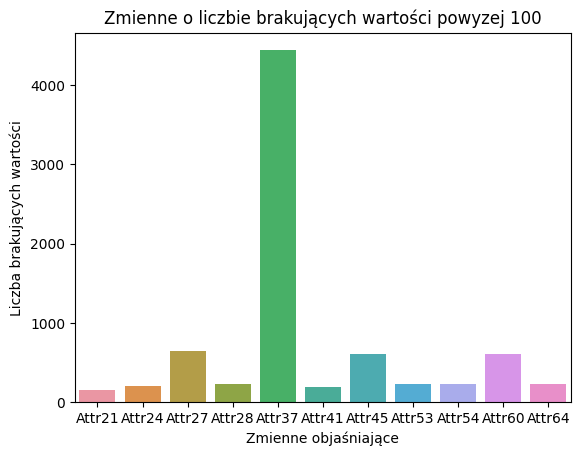

In [9]:
nans_to_plot = nans[nans > 100]
ax = sns.barplot(nans_to_plot.index, nans_to_plot)
ax.set(xlabel='Zmienne objaśniające', ylabel='Liczba brakujących wartości', title = 'Zmienne o liczbie brakujących wartości powyzej 100')

In [26]:
positive_class_rate

0.04152766593811112

In [28]:
1 - positive_class_rate

0.9584723340618889

Klasa pozytywna     4.15
Klasa negatywna    95.85
dtype: float64


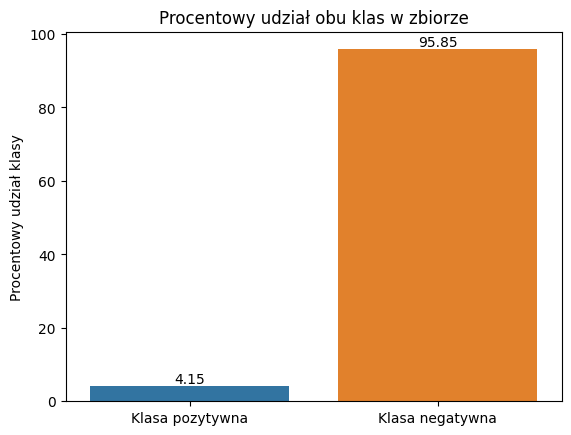

In [49]:
negative_class_rate = (1 - positive_class_rate)
rates_array = (np.array([positive_class_rate, negative_class_rate])*100).round(2)
rates = pd.Series(rates_array, index = ['Klasa pozytywna', 'Klasa negatywna'])
ax = sns.barplot(y=rates, x=rates.index, orient = 'v')
ax.set(ylabel='Procentowy udział klasy', title = 'Występowanie obu klas w zbiorze')
ax.bar_label(ax.containers[0])
print(rates)

In [571]:
RANDOM_STATE = 43
RATIO = 1.0
K_FOLD = 5
ros = RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = RATIO)
lr = LogisticRegression(penalty='none')
pipeline = make_pipeline(ros, lr)



In [572]:
X = df.loc[:, ~df.columns.isin(['class'])]
y = df['class']

In [573]:
df

,index,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0,0.159290,0.46240,0.077730,1.16830,-44.8530,0.467020,0.189480,0.82895,1.12230,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.05600,0.0
1,1,-0.127430,0.46243,0.269170,1.75170,7.5970,0.000925,-0.127430,1.16250,1.29440,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.47250,0.0
2,2,0.070488,0.23570,0.527810,3.23930,125.6800,0.163670,0.086895,2.87180,1.05740,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.78180,0.0
3,3,0.136760,0.40538,0.315430,1.87050,19.1150,0.504970,0.136760,1.45390,1.11440,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.64840,0.0
4,4,-0.110080,0.69793,0.188780,1.27130,-15.3440,0.000000,-0.110080,0.43282,1.73500,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.03600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9787,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,1.0
8689,9788,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,1.0
8690,9789,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,1.0
8691,9790,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,1.0


In [574]:
auc_roc = []
kf = StratifiedKFold(n_splits=K_FOLD)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = pipeline.fit(X_train, y_train).predict_proba(X_test)[:,1]

    auc_roc.append(roc_auc_score(y_test, y_pred))


#print('ROC_AUC = {} +/- {}'.format(np.round(mean(auc_roc),4), np.round(stdev(auc_roc),4)))

/Users/gabrielalibudzka/.pyenv/versions/3.9.13/envs/bachelor_thesis-3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gabrielalibudzka/.pyenv/versions/3.9.13/envs/bachelor_thesis-3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for